In [167]:
import numpy as np
from sklearn.datasets import fetch_openml
#8
#204
#210-2
#1096 
##206 
##1096
##344
#207 - 6 
##209 
##225
##561
##564
#547 - 0
#509
#521 
#522 
#523 
#526-2--
#257 - 3 
#530
#533 

cloudSeed = fetch_openml(data_id='210')


cloudSeed.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [168]:
 
X, y = cloudSeed.data, cloudSeed.target

X.shape, y.shape


((108, 5), (108,))

0


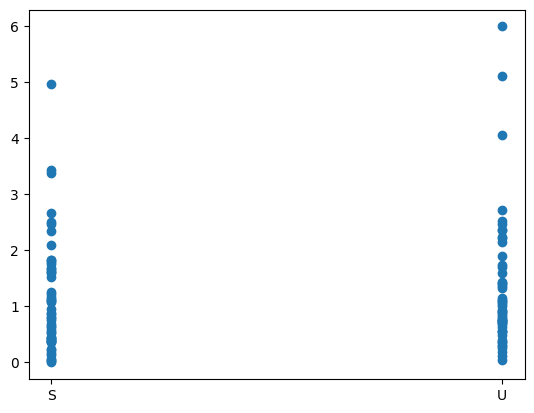

1


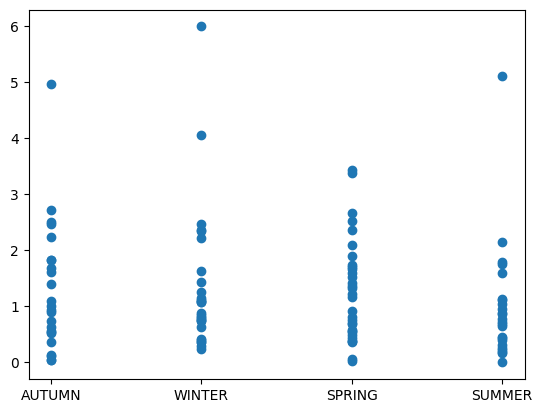

2


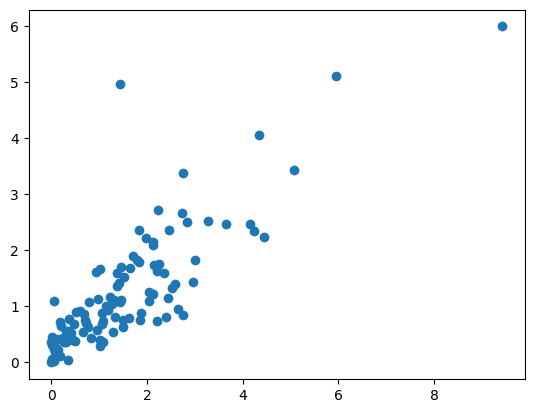

3


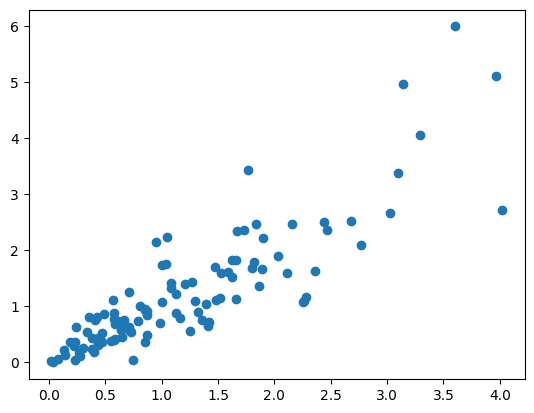

4


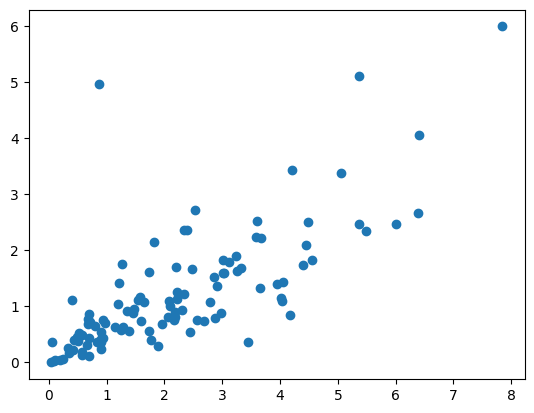

In [169]:
import matplotlib.pylab as plt
for i in range(X.shape[1]):
    print(i)
    plt.scatter(X.iloc[:,i], y)
    plt.show()






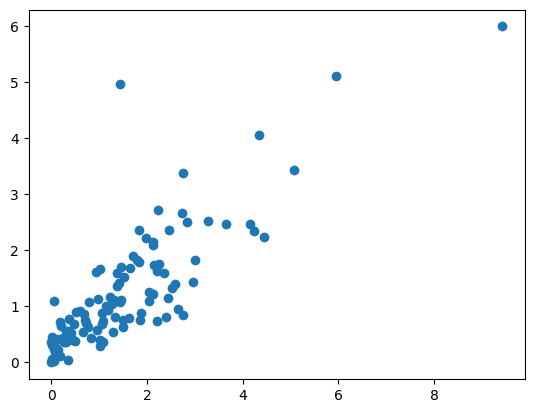

In [170]:
X2 = X.iloc[:,2:3]
plt.scatter(X2,y)
plt.show()


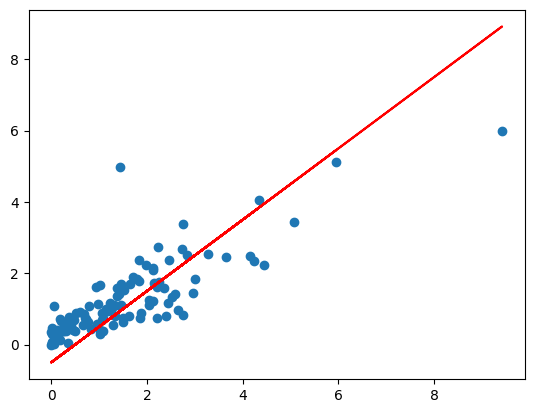

In [171]:
def modelo_linear(X, a, b):
    y = a*X + b
    return y
ypred = modelo_linear(X2, 1, -0.5)
plt.scatter(X2, y)
plt.plot(X2, ypred, 'r')
plt.show()

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo = LinearRegression()
modelo.fit(X2, y)
ypred = modelo.predict(X2)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

0.35126174920765485
0.28810865554713094 [0.62698546]


In [174]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y, ypred):
    mse = mean_squared_error(y,ypred)
    return sqrt(mse)
ypred = modelo_linear(X2, -1, 40)
rmse(y, ypred)

37.33778677554812

1.63366323198986
0.592674240552575


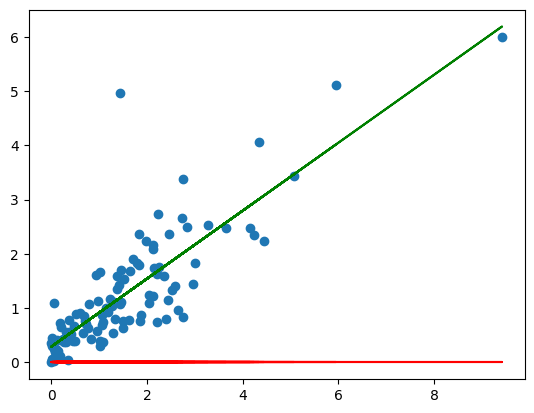

array([[0.28954841],
       [0.6264015 ]])

In [185]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2,1))
        
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b = np.concatenate((bias,X),axis=1)
        return X_b

    def fit(self,X,y):
        X_b = self.addBias(X)
        for _ in range(100):
            ypred = self.predict(X)
            erro = ypred - y.values.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1, 1)
            self.w = self.w - 0.1*ajuste

    def predict(self, X):
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y

plt.scatter(X2, y)
modelo = regressao_linear()
ypred = modelo.predict(X2)
print(rmse(y,ypred))
plt.plot(X2, ypred, 'r')

modelo.fit(X2, y)

ypred = modelo.predict(X2)
print(rmse(y,ypred))
plt.plot(X2, ypred, 'g')
plt.show()
modelo.w

In [199]:
from sklearn.metrics import mean_squared_error
import numpy as np
#w0 = np.linspace(0.27, 0.31, 0.26)
w0 = np.linspace(-33, 33, 30)
w1 = np.linspace(1, 0.8, 30)

def z_function(W0, W1):
    modelo = regressao_linear()
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = W0[j][k]
            modelo.w[1] = W1[j][k]
            ypred = modelo.predict(X2)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro

#ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)


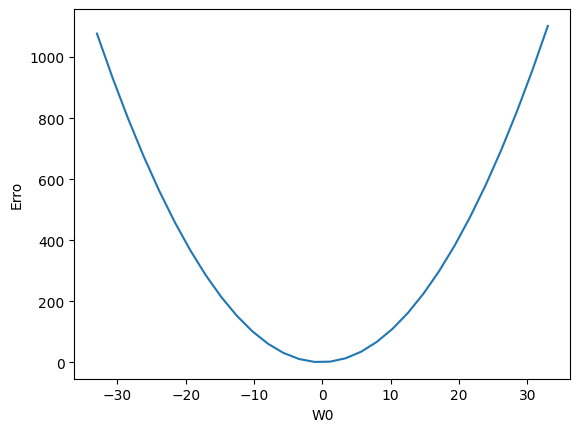

In [200]:
plt.ylabel("Erro")
plt.xlabel("W0")
i=8
#print(W0[i,:],Erro[i,:])
plt.plot(W0[i,:],Erro[i,:])

plt.show()